<a href="https://colab.research.google.com/github/dabin3178/Korean-Newords-NLP/blob/main/xgboost_%EC%A7%84%EC%A7%9C%EC%A7%84%EC%A7%9C%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install soynlp

In [ ]:
import re

def text_preprocess(x): # 공백도 제외
    text=[]
    a = re.sub('[^가-힣\\s]', '',x)
    for j in a.split():
        text.append(j)
    return ' '.join(text)

def make_ngrams(x): # 부분 글자 만드는 함수
    result = []
    for i in range(1, len(x) + 1):
        ngram = []
        for j in range(0, len(x) - i + 1):
            ngram.append(x[j:j+i])
        result.extend(ngram)

    return result


In [ ]:
import pandas as pd
text_df = pd.read_csv("/content/유투브 랜덤 돌려보기.csv", encoding='cp949') # 불러올 문장

text_df['comment'] = text_df['comment'].apply(lambda x: str(x))
text_df['process'] = text_df['comment'].apply(lambda x : text_preprocess(x))  # 정규표현식으로 필요한 부분만 걸러냄.
text_df['process'] = text_df['process'].apply(lambda x: x.split())

words = [] # 여러 어절을 하나의 리스트로 저장할 배열
partial_words = [] # 여러 부분 단어를 하나의 리스트로 저장할 배열

for i in range(len(text_df['process'])):
    words.extend(text_df['process'][i])

data = {
    'words' : list(set(words))
}

new_words_df = pd.DataFrame(data)

new_words_df['candidate'] = new_words_df['words'].apply(lambda x: make_ngrams(x))

for i in range(len(text_df['comment'])):
    text_df['comment'][i] = (text_df['comment'][i] + '\n') * 64



for i in range(len(new_words_df['candidate'])):
    partial_words.extend(new_words_df['candidate'][i])


In [ ]:
text_df

,comment,process
0,응답하라 시리즈때부터 워낙 낚시를 잘하는 제작인이니 제발!! ㄱㅈㅍㄹ이 아닌 재밌는...,"[응답하라, 시리즈때부터, 워낙, 낚시를, 잘하는, 제작인이니, 제발, 이, 아닌,..."
1,그게 아니라도 부모님 중 한분이 경찰이나 가정폭력 관련 직업에 종사하시거나 어머니 ...,"[그게, 아니라도, 부모님, 중, 한분이, 경찰이나, 가정폭력, 관련, 직업에, 종..."
2,저도 다른 분들의 생각처럼 겨울이엄마가 가정폭력 관련 직업을 가진 사람으로 생각해요...,"[저도, 다른, 분들의, 생각처럼, 겨울이엄마가, 가정폭력, 관련, 직업을, 가진,..."
3,시즌2가 4회밖에 안남았다는게 슬프지만 시즌2마지막회에서는 겨울정원이 결혼할것 같아...,"[시즌가, 회밖에, 안남았다는게, 슬프지만, 시즌마지막회에서는, 겨울정원이, 결혼할..."
4,아버지가 있는건 확실한데 간호는 둘다 직장이 있는 아들 딸만 한다는건 \n아버지가 ...,"[아버지가, 있는건, 확실한데, 간호는, 둘다, 직장이, 있는, 아들, 딸만, 한다는건]"
5,가정폭력은 맞는거 같고.. 시즌1 겨울이 성격보면 그게 많은 영향을 끼친 느낌..\...,"[가정폭력은, 맞는거, 같고, 시즌, 겨울이, 성격보면, 그게, 많은, 영향을, 끼..."
6,전 겨울정원이요~~\n전 겨울정원이요~~\n전 겨울정원이요~~\n전 겨울정원이요~~...,"[전, 겨울정원이요]"
7,겨울정원 얘기 나눠주셔서 감사해요\n겨울정원 얘기 나눠주셔서 감사해요\n겨울정원 얘...,"[겨울정원, 얘기, 나눠주셔서, 감사해요]"
8,노태문만 짤라도 지금보다는 상황이 괜찬을것 같은데\n노태문만 짤라도 지금보다는 상황...,"[노태문만, 짤라도, 지금보다는, 상황이, 괜찬을것, 같은데]"
9,바형은 이미 상향평준화되서 끝물같긴함 폴더블 혁신적이도 미래적이고 환상적인데 실사용...,"[바형은, 이미, 상향평준화되서, 끝물같긴함, 폴더블, 혁신적이도, 미래적이고, 환..."


In [ ]:
import pandas as pd
eta_secret_labeled = pd.read_csv("/content/eta_비밀.csv")
eta_sisa_labeled = pd.read_csv("/content/df_에타_sisa.csv")
eta_global_labeled = pd.read_csv("/content/Globalfree.csv")
deoku_labeled = pd.read_csv("/content/deoku.csv")
ppomppu_labeled = pd.read_csv("/content/ppomppu1.csv")
ppomppu2_labeled = pd.read_csv("/content/ppomppu2.csv")
youtube_labeled = pd.read_csv("/content/유튜브15개.csv")
navernews_labeled = pd.read_csv("/content/navernews.csv")
nate_pann_labeled = pd.read_csv("/content/네이트판_통합.csv")
dc_inside_labeled = pd.read_csv("/content/df_DC_total.csv")

labeled_data_df = pd.concat([eta_secret_labeled, eta_sisa_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, eta_global_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, deoku_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, ppomppu_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, ppomppu2_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, youtube_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, navernews_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, nate_pann_labeled],ignore_index=True)
labeled_data_df = pd.concat([labeled_data_df, dc_inside_labeled],ignore_index=True)

for column in labeled_data_df.columns:
    if column != 'comment':
        labeled_data_df = labeled_data_df.drop(column, axis=1)

labeled_data_df.to_csv("total_data.csv", encoding='utf-8-sig', index=False)

labeled_data_df

,comment
0,요즘 들어 본인 의견 말하기도 무서워지는거 같아.북한의 정치 ~ 어쩌고 하면서 연인...
1,하고싶은 게 많아서 할 일도 많은데 이게 다 돈이 되는 일이 아니라는 게 좀 슬프다...
2,스마일~
3,오늘 책도 반납해야 하고 전입신고도 해야하는데 일어나기 너무 귀찮아서 일단 침대에 ...
4,카톡 차단 확인할려구 차단하고 풀었는데 친구추천에는 안 떠 그럼 차단 맞지??근데 ...
...,...
1996139,야갤하는 여자는 도대체 어떤 인생을 사는 걸까
1996140,섹스
1996141,pp
1996142,흐읏흥


In [ ]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
import pandas as pd

df = pd.read_csv("/content/total_data.csv", encoding="utf-8", engine="python") # raw data 불러오기

train_corpus = "" # raw data를 쭉이을 빈 문자열

df['comment'] = df['comment'].apply(lambda x: str(x))
df['process'] = df['comment'].apply(lambda x: text_preprocess(x)) # 불필요한 문자 제거

for i in range(len(df['process'])):
    train_corpus += df['process'][i] + '\n' # 문자열을 쭉 이음.

for i in range(len(text_df['comment'])):
    train_corpus += text_df['comment'][i]

for i in range(2):
    train_corpus += train_corpus + '\n'

In [ ]:
with open("/content/train_corpus.txt", 'w') as file: # txt 파일로 저장
    file.write(train_corpus)

In [ ]:
train_corpus = DoublespaceLineCorpus("/content/train_corpus.txt") # 저장한 txt 파일로 변환
len(train_corpus)

7853147

In [ ]:
# 코퍼스로 학습
word_extractor = WordExtractor()
word_extractor.train(train_corpus)
word_score_table = word_extractor.extract()

training was done. used memory 5.766 Gb
all cohesion probabilities was computed. # words = 1034390
all branching entropies was computed # words = 3289702
all accessor variety was computed # words = 3289702


In [ ]:
tmp = partial_words
text = []
for i in range(len(tmp)):
    try:
        word_score_table[tmp[i]].cohesion_forward
        text.append(tmp[i])
    except KeyError:
        pass

validation = {
    "words": text
}

validation_df = pd.DataFrame(validation)
validation_df['freq'] = validation_df['words'].apply(lambda x: word_score_table[x].leftside_frequency + word_score_table[x].rightside_frequency)
#validation_df['freq_ratio'] = validation_df['freq'].apply(lambda x: (x / sum(list(validation_df['freq']))) * 100)
validation_df['length'] = validation_df['words'].apply(lambda x: len(x))
validation_df['cohesion_forward'] = validation_df['words'].apply(lambda x: word_score_table[x].cohesion_forward)
validation_df['left_branching_entropy'] = validation_df['words'].apply(lambda x: word_score_table[x].left_branching_entropy)
validation_df['right_branching_entropy'] = validation_df['words'].apply(lambda x: word_score_table[x].right_branching_entropy)
validation_df['left_accessor_variety'] = validation_df['words'].apply(lambda x: word_score_table[x].left_accessor_variety)
validation_df['starts_ratio'] = validation_df['words'].apply(lambda x: word_score_table[x].leftside_frequency)

for i in range(len(validation_df['starts_ratio'])):
    validation_df['starts_ratio'][i] = (validation_df['starts_ratio'][i] / validation_df['freq'][i]) * 100

validation_df

,words,freq,length,cohesion_forward,left_branching_entropy,right_branching_entropy,left_accessor_variety,starts_ratio
0,영,207636,1,0.000000,5.404542,3.729152,966,75
1,향,14788,1,0.000000,4.750961,4.948738,347,40
2,을,297856,1,0.000000,5.576596,5.484277,1001,0
3,영향을,1048,3,0.080396,2.354714,2.077091,31,96
4,기,616368,1,0.000000,5.636283,5.788258,1376,37
...,...,...,...,...,...,...,...,...
2177,우,263212,1,0.000000,5.204425,3.967081,1045,71
2178,배우,30872,2,0.139575,5.078229,5.064021,540,76
2179,전문배우,292,4,0.114344,0.599167,0.474777,8,100
2180,이,1970496,1,0.000000,5.906000,5.794934,2250,45


In [ ]:
pip install XGBoost

In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings

warnings.filterwarnings('ignore')

dataset = pd.read_csv("/content/labeling_oversampling.csv")

y_label = dataset['label'].apply(lambda x: int(x))

X_features = dataset.drop(columns=['freq_ratio', 'label'], axis=1)

newly_coined_words_df = pd.DataFrame(X_features.copy())
newly_coined_words_df['label'] = y_label
newly_coined_words_df

,freq,length,cohesion_forward,left_branching_entropy,right_branching_entropy,left_accessor_variety,starts_ratio,label
0,352,3,0.124943,3.087665,2.561511,37,97,0
1,232,3,0.055058,3.011088,0.948307,28,100,0
2,256,4,0.136442,3.404558,2.785716,39,100,0
3,148,4,0.170890,2.907327,2.910103,23,100,0
4,136,3,0.070635,3.233183,2.799973,26,82,0
...,...,...,...,...,...,...,...,...
36615,140,4,0.221532,1.579637,1.413289,9,100,1
36616,144,4,0.940361,2.781463,2.651950,20,91,1
36617,394,3,0.083799,3.733868,3.434715,54,100,1
36618,329,2,0.460552,3.534511,3.402091,45,83,1


In [ ]:
newly_coined_words_df['label'].value_counts()

1    18310
0    18310
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(29296, 7) (7324, 7)


In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth' : 3,
         'eta' : 0.1, 
         'scale_pos_weight': 1,
         'objective' : 'binary:logistic',
         'eval_metric' : 'error',
         'early_stoppings' : 100 }

num_rounds = 400

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명시
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-error:0.248635	eval-error:0.244539
[1]	train-error:0.247576	eval-error:0.245767
[2]	train-error:0.247611	eval-error:0.245631
[3]	train-error:0.24587	eval-error:0.244265
[4]	train-error:0.245938	eval-error:0.244402
[5]	train-error:0.246075	eval-error:0.244129
[6]	train-error:0.245733	eval-error:0.24331
[7]	train-error:0.243617	eval-error:0.242764
[8]	train-error:0.242798	eval-error:0.241125
[9]	train-error:0.240715	eval-error:0.240715
[10]	train-error:0.239589	eval-error:0.23894
[11]	train-error:0.223307	eval-error:0.22556
[12]	train-error:0.221737	eval-error:0.222829
[13]	train-error:0.220474	eval-error:0.224058
[14]	train-error:0.219757	eval-error:0.223512
[15]	train-error:0.219074	eval-error:0.221737
[16]	train-error:0.218426	eval-error:0.220644
[17]	train-error:0.2159	eval-error:0.217777
[18]	train-error:0.215558	eval-error:0.21846
[19]	train-error:0.215593	eval-error:0.219552
[20]	train-error:0.214261	eval-error:0.217777
[21]	train-error:0.214193	eval-error:0.21805
[22]	t

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.508 0.126 0.801 0.77  0.011 0.073 0.791 0.865 0.708 0.936]
예측값 10개만 표시:  [1, 0, 1, 1, 0, 0, 1, 1, 1, 1]


In [ ]:
dtext = xgb.DMatrix(data=validation_df.drop(columns='words', axis=1))
validation_preds_probs = xgb_model.predict(dtext)
validation_preds = [ 1 if x > 0.5 else 0 for x in validation_preds_probs]

official_dict_df = pd.read_csv("/content/표준어사전.csv")
official_dict = {official_dict_df['어휘'][i]: "" for i in range(len(official_dict_df['어휘']))}

for i in range(len(text)):
    try:
        official_dict[text[i]]
        validation_preds[i] = 0
    except KeyError:
        pass


result = {
    'words': text,
    'label': validation_preds
}

result_df = pd.DataFrame(result)
answer = []
for i in range(len(result_df['label'])):
    if result_df['label'][i] == 1:
        answer.append(result_df['words'][i])

answer[:10]

['달리', '메달리스트들', '미쳤다', '감사', '기대해봅니다', '멋진', '부모님', '사장님', '화이팅', '뭐에요']

In [ ]:
result_df

,words,label
0,영,0
1,향,0
2,을,0
3,영향을,0
4,기,0
...,...,...
2177,우,0
2178,배우,0
2179,전문배우,0
2180,이,0


In [ ]:
validation_df

,words,freq,length,cohesion_forward,left_branching_entropy,right_branching_entropy,left_accessor_variety,starts_ratio
0,영,207636,1,0.000000,5.404542,3.729152,966,75
1,향,14788,1,0.000000,4.750961,4.948738,347,40
2,을,297856,1,0.000000,5.576596,5.484277,1001,0
3,영향을,1048,3,0.080396,2.354714,2.077091,31,96
4,기,616368,1,0.000000,5.636283,5.788258,1376,37
...,...,...,...,...,...,...,...,...
2177,우,263212,1,0.000000,5.204425,3.967081,1045,71
2178,배우,30872,2,0.139575,5.078229,5.064021,540,76
2179,전문배우,292,4,0.114344,0.599167,0.474777,8,100
2180,이,1970496,1,0.000000,5.906000,5.794934,2250,45


In [ ]:
def get_confusion(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_confusion(y_test, preds)

오차행렬:
 [[2933  682]
 [ 427 3282]]

정확도: 0.8486
정밀도: 0.8280
재현율: 0.8849
F1: 0.8555
AUC: 0.8481


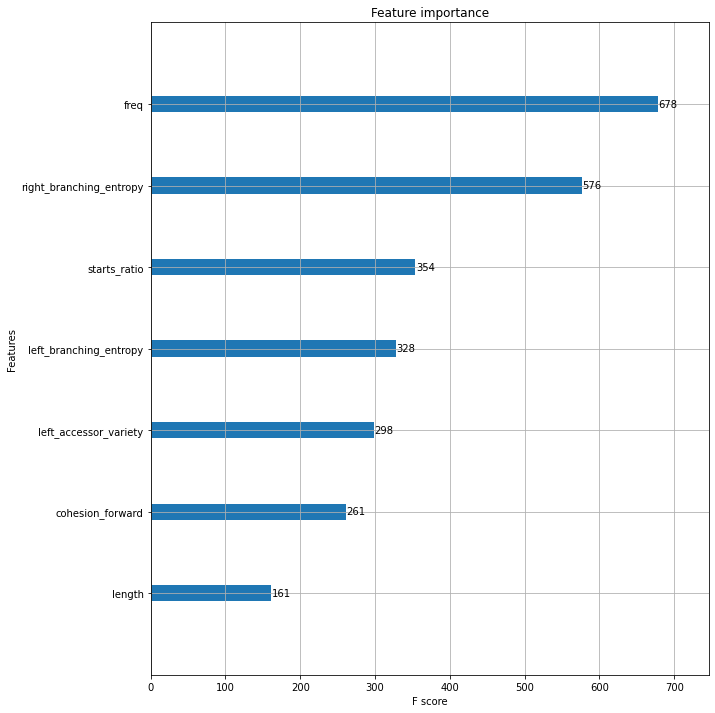

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [ ]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1 , max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, 
                eval_metric="error", eval_set = evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-error:0.244539
Will train until validation_0-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.245767
[2]	validation_0-error:0.245631
[3]	validation_0-error:0.244265
[4]	validation_0-error:0.244402
[5]	validation_0-error:0.244129
[6]	validation_0-error:0.24331
[7]	validation_0-error:0.242764
[8]	validation_0-error:0.241125
[9]	validation_0-error:0.240715
[10]	validation_0-error:0.23894
[11]	validation_0-error:0.22556
[12]	validation_0-error:0.222829
[13]	validation_0-error:0.224058
[14]	validation_0-error:0.223512
[15]	validation_0-error:0.221737
[16]	validation_0-error:0.220644
[17]	validation_0-error:0.217777
[18]	validation_0-error:0.21846
[19]	validation_0-error:0.219552
[20]	validation_0-error:0.217777
[21]	validation_0-error:0.21805
[22]	validation_0-error:0.216958
[23]	validation_0-error:0.214364
[24]	validation_0-error:0.215046
[25]	validation_0-error:0.210541
[26]	validation_0-error:0.209448
[27]	validation_0-error:0.209312
[28]	validation_0-error:

In [ ]:
get_confusion(y_test, ws100_preds)

오차행렬:
 [[2933  682]
 [ 427 3282]]

정확도: 0.8486
정밀도: 0.8280
재현율: 0.8849
F1: 0.8555
AUC: 0.8481


In [ ]:
pred_probs = ws100_preds
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[1 0 1 1 0 0 1 1 1 1]
예측값 10개만 표시:  [1, 0, 1, 1, 0, 0, 1, 1, 1, 1]


In [ ]:
dtext = xgb.DMatrix(data=validation_df.drop(columns='words', axis=1))
validation_preds_probs = xgb_model.predict(dtext)
validation_preds = [ 1 if x > 0.5 else 0 for x in validation_preds_probs]

official_dict_df = pd.read_csv("/content/표준어사전_전처리.csv")
official_dict = {official_dict_df['어휘'][i]: "" for i in range(len(official_dict_df['어휘']))}

for i in range(len(text)):
    try:
        official_dict[text[i]]
        validation_preds[i] = 0
    except KeyError:
        pass


result = {
    'words': text,
    'label': validation_preds
}

result_df = pd.DataFrame(result)
answer = []
for i in range(len(result_df['label'])):
    if result_df['label'][i] == 1:
        answer.append(result_df['words'][i])

answer[:10]

['메달리스트들', '미쳤다', '기대해봅니다', '멋진', '사장님', '화이팅', '뭐에요', '애플', '잘하는', '결혼할']

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 28.0 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import *

kkma = Kkma()

tmp = answer.copy()
answer = []

flag = True
for i in range(len(tmp)):
    flag = True
    pos_result = kkma.pos(tmp[i])
    for pos in pos_result:
        if pos[1][0] == 'E' or pos[1][0] == 'J' or pos[1][0] == 'X':
            flag = False

    if flag is True:
        answer.append(tmp[i])

answer[:10]

['사장님', '애플', '뭔가', '유재석', '유재석', '두번째', '왜케', '폴더블', '뭔데', '퀄리티']

In [ ]:
#answer
words_dict = {word: "" for word in answer}

for i in range(len(result_df['label'])):
    try:
        words_dict[result_df['words'][i]]
    except KeyError:
        result_df['label'][i] = 0
        list(set(answer))

result_df.head(10)

,words,label
0,영,0
1,향,0
2,을,0
3,영향을,0
4,기,0
5,대,0
6,되,0
7,는,0
8,기대,0
9,되는,0


In [ ]:
result_df.to_csv('00.csv', encoding='utf-8-sig')

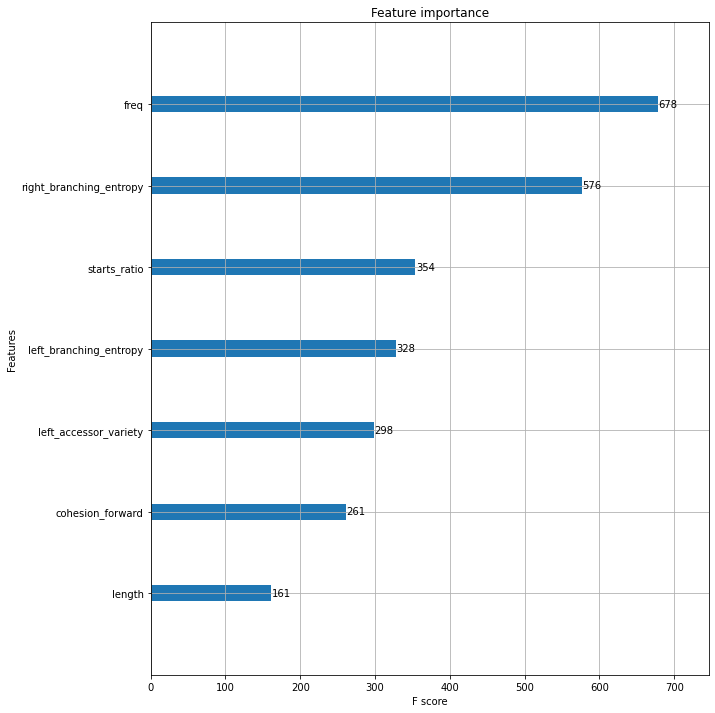

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax)

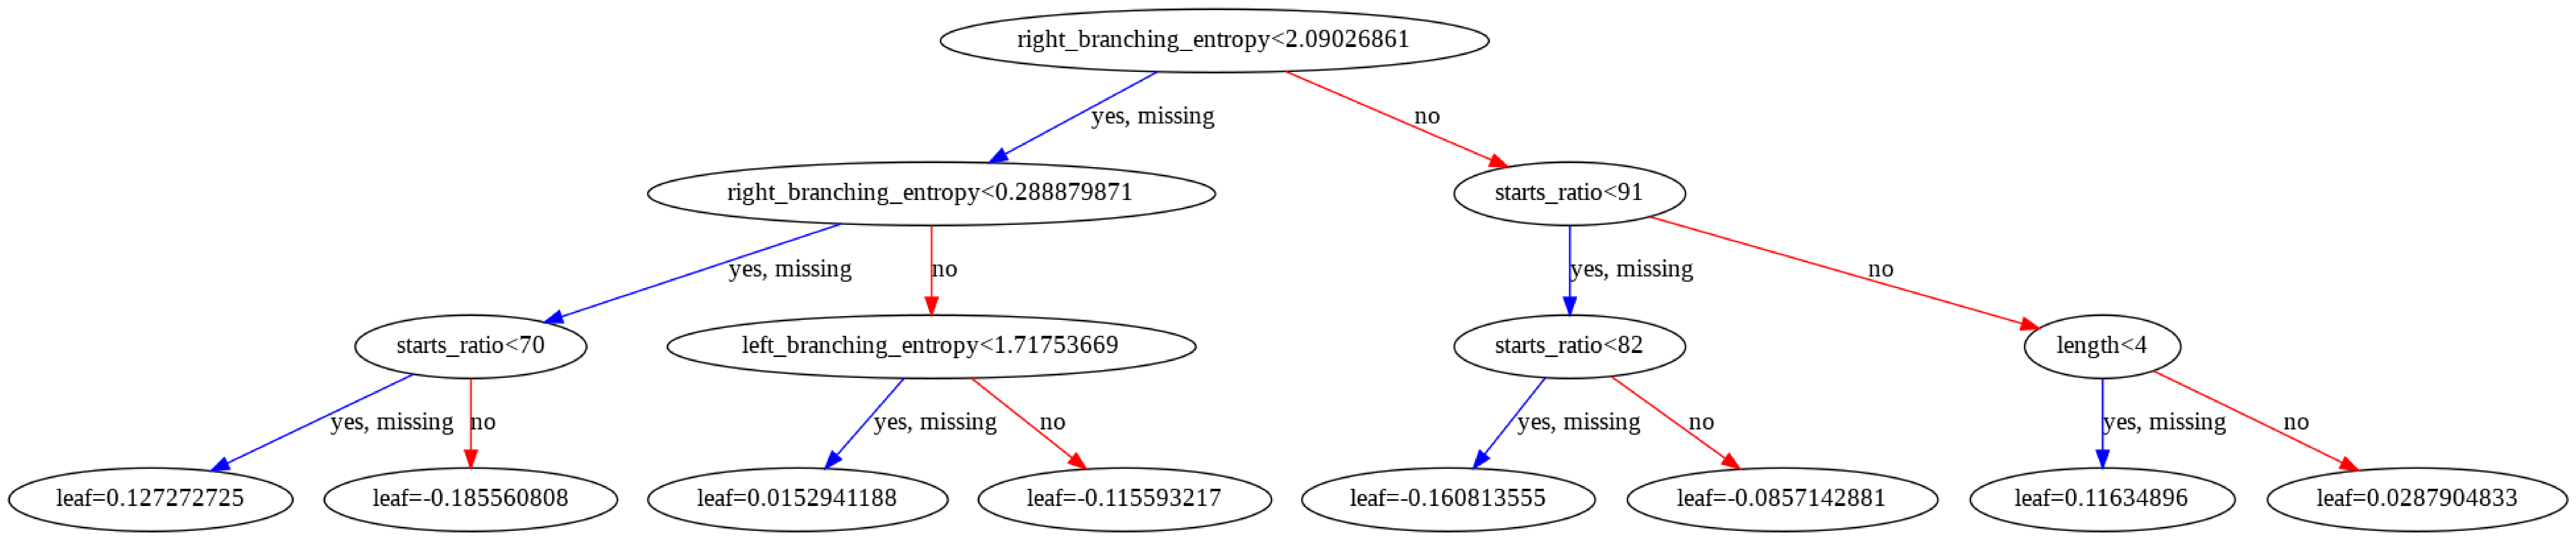

In [ ]:
from xgboost import plot_tree

plot_tree(xgb_wrapper, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()